In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Загрузка данных
digits = load_digits()
X = digits.data
y = (digits.target == 1).astype(int)  # Бинарная классификация, пример с цифрой 1

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Сигмоидная функция активации
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Производная сигмоидной функции
def sigmoid_derivative(x):
    return x * (1 - x)

# Инициализация весов
np.random.seed(42)
weights = 2 * np.random.random((X_train.shape[1], 1)) - 1

Реализовать однослойный перцептрон без использования библиотек.

In [4]:
# Обучение однослойного перцептрона
def train_perceptron(X, y, weights, epochs=1000, learning_rate=0.01):
    errors = []
    for epoch in range(epochs):
        # Прямой проход
        output = sigmoid(np.dot(X, weights))

        # Вычисление ошибки
        error = y - output
        errors.append(np.mean(np.abs(error)))

        # Обратный проход и коррекция весов
        adjustment = learning_rate * np.dot(X.T, error * sigmoid_derivative(output))
        weights += np.mean(adjustment)

    return errors

In [5]:
# Обучение
epochs = 1000
learning_rate = 0.00001
errors = train_perceptron(X_train, y_train, weights, epochs, learning_rate)

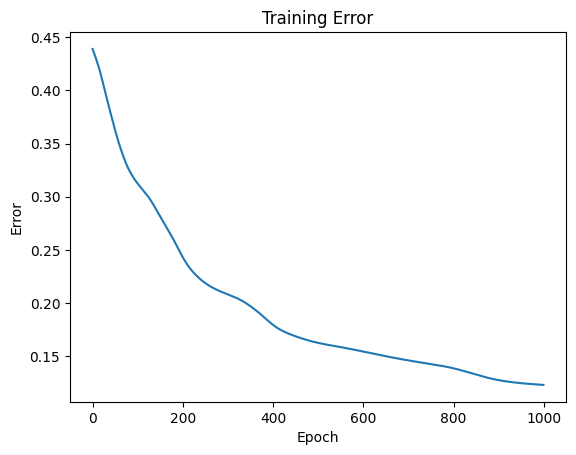

Accuracy: 0.9194444444444444


In [6]:
# Построение графика ошибок
plt.plot(range(epochs), errors)
plt.title('Training Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

# Прогнозирование на тестовой выборке
predictions = sigmoid(np.dot(X_test, weights))

# Преобразование предсказаний в бинарный формат
predictions_binary = (predictions > 0.5).astype(int)

# Вычисление точности
accuracy = accuracy_score(y_test, predictions_binary)
print(f'Accuracy: {accuracy}')

Сравнить результаты с использованием однослойного перцептрона из sklearn.

In [7]:
from sklearn.linear_model import Perceptron

# Создание и обучение однослойного перцептрона из sklearn
perceptron_sklearn = Perceptron(random_state=42, max_iter=1000, tol=1e-3)
perceptron_sklearn.fit(X_train, y_train)

# Предсказание на тестовой выборке
predictions_sklearn = perceptron_sklearn.predict(X_test)

# Вычисление точности
accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)
print(f'Accuracy (sklearn): {accuracy_sklearn}')


Accuracy (sklearn): 0.9777777777777777


Сравнить результаты с использованием многослойного перцептрона из sklearn.

In [8]:
from sklearn.neural_network import MLPClassifier

# Создание и обучение многослойного перцептрона из sklearn
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)

# Предсказание на тестовой выборке
predictions_mlp = mlp_classifier.predict(X_test)

# Вычисление точности
accuracy_mlp = accuracy_score(y_test, predictions_mlp)
print(f'Accuracy (MLP sklearn): {accuracy_mlp}')


Accuracy (MLP sklearn): 0.9944444444444445


Многослойный перцептрон дал лучшую точность!